In [3]:
#import regex
import re

#start process_tweet
def processTweet(tweet):
    # process the tweets

    #Convert to lower case
    tweet = tweet.lower()
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #trim
    tweet = tweet.strip('\'"')
    return tweet

In [4]:
#start replaceTwoOrMore
def replaceTwoOrMore(s):
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)
#end

#start getfeatureVector
def getFeatureVector(tweet,stopWords):
    featureVector = []
    #split tweet into words
    words = tweet.split()
    for w in words:
        #replace two or more with two occurrences
        w = replaceTwoOrMore(w)
        #strip punctuation
        w = w.strip('\'"?,.')
        #check if the word stats with an alphabet
        val = re.search(r"^[a-zA-Z][a-zA-Z0-9]*$", w)
        #ignore if it is a stop word
        if(w in stopWords or val is None):
            continue
        else:
            featureVector.append(w.lower())
    return featureVector
#end

In [5]:
#start extract_features
def extract_features(tweet):
    tweet_words = set(tweet)
    features = {}
    for word in featureList:
        features['contains(%s)' % word] = (word in tweet_words)
    return features
#end

In [6]:
#Read the tweets one by one and process it
import nltk
from nltk.corpus import stopwords
import csv
inpTweets = csv.reader(open('dataset/ClassifiedTweets.csv', 'rb'), delimiter=',')
next(inpTweets)
#stopWords = getStopWordList('dataset/stopwords.txt')

	
stopWords = set(stopwords.words('english')) 
featureList = []

# Get tweet words
tweets = []
for row in inpTweets:
    sentiment = row[7]
    tweet = row[6]
    processedTweet = processTweet(tweet)
    featureVector = getFeatureVector(processedTweet,stopWords)
    featureList.extend(featureVector)
    tweets.append((featureVector, sentiment));
#end loop

# Remove featureList duplicates
featureList = list(set(featureList))

# Extract feature vector for all tweets in one shote
training_set = nltk.classify.util.apply_features(extract_features, tweets)

In [7]:
train_set = training_set[:2010]
test_set = training_set[2010:]

In [8]:
from time import time

In [9]:
t0=time()
# Train the classifier
NBClassifier = nltk.NaiveBayesClassifier.train(train_set)
print "training time:", round(time()-t0, 3) , "s"

t1=time()
# Test the classifier
print("Naive Bayes accuracy percent:",nltk.classify.accuracy(NBClassifier, test_set))
print "test time:", round(time()-t1, 3), "s"

training time: 7.021 s
('Naive Bayes accuracy percent:', 0.7965116279069767)
test time: 11.398 s


In [10]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(train_set)
print("MultinomialNB accuracy percent:",nltk.classify.accuracy(MNB_classifier, test_set))

BNB_classifier = SklearnClassifier(BernoulliNB())
BNB_classifier.train(train_set)
print("BernoulliNB accuracy percent:",nltk.classify.accuracy(BNB_classifier, test_set))

('MultinomialNB accuracy percent:', 0.7453488372093023)
('BernoulliNB accuracy percent:', 0.6941860465116279)


In [11]:
from sklearn import cross_validation
from sklearn.svm import LinearSVC, SVC

SVM_classifier = SklearnClassifier(LinearSVC(), sparse=False)
SVM_classifier.train(train_set)

print("SVM accuracy percent:",nltk.classify.accuracy(SVM_classifier, test_set))

C:\Users\Aman\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


('SVM accuracy percent:', 0.8755813953488372)


In [12]:
#Max Entropy Classifier
MaxEntClassifier = nltk.classify.maxent.MaxentClassifier.train(train_set, 'GIS', trace=3, \
                    encoding=None, labels=None, gaussian_prior_sigma=0, max_iter = 10)

print("Max Ent accuracy percent:",nltk.classify.util.accuracy(MaxEntClassifier, test_set))

  ==> Training (10 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -1.09861        0.477
             2          -0.98756        0.477
             3          -0.98651        0.477
             4          -0.98556        0.477
             5          -0.98461        0.477
             6          -0.98365        0.477
             7          -0.98270        0.477
             8          -0.98175        0.477
             9          -0.98081        0.477
         Final          -0.97986        0.477
('Max Ent accuracy percent:', 0.44534883720930235)


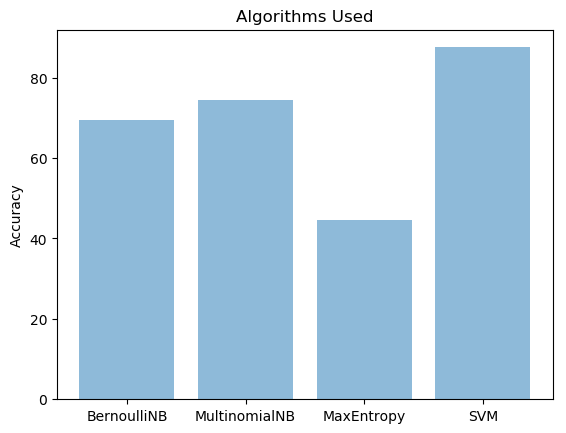

In [13]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('BernoulliNB', 'MultinomialNB', 'MaxEntropy', 'SVM')
y_pos = np.arange(len(objects))
performance = [69.41,74.53,44.53,87.56]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithms Used')
 
plt.show()